[View in Colaboratory](https://colab.research.google.com/github/scumabo/Deep-Learning-with-tf.keras/blob/master/1_Linear_regression_(tf_keras).ipynb)

In [0]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Univariate Data

In [2]:
data = pd.read_csv('ex1data1.txt', header=None).values
X = data[:, [0]]
Y = data[:, [1]]
X = X / max(X)

print(str(X.shape[0]) + " examples, " + str(X.shape[1]) + " features")

97 examples, 1 features


In [0]:
np.random.seed(seed=1)
model = tf.keras.Sequential()
layer = tf.keras.layers.Dense(1)
model.add(layer)

model.compile(optimizer = 'adam',
              loss = 'MSE',
              metrics=['MSE'])

history = model.fit(X, Y, epochs = 2000, verbose = 0)

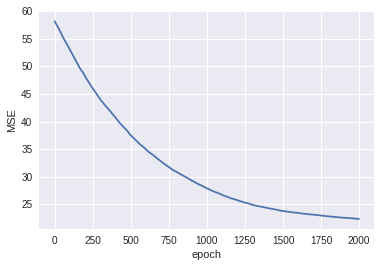

In [4]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

In [0]:
weights = layer.get_weights()

w = weights[0]
b = weights[1]

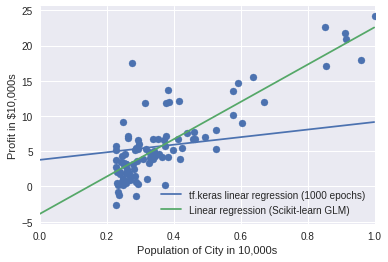

In [6]:
xx = np.arange(0, 1, 0.001)
yy = w * xx + b

plt.scatter(X, Y)
plt.plot(xx, yy.T, label='tf.keras linear regression (1000 epochs)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X, Y)
plt.plot(xx, (regr.intercept_+regr.coef_*xx).T, label='Linear regression (Scikit-learn GLM)')

plt.xlim(0,1)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [0]:
model = tf.keras.Sequential()
layer = tf.keras.layers.Dense(1)
model.add(layer)

model.compile(optimizer = 'SGD',
              loss = 'MSE',
              metrics=['MSE'])

history = model.fit(X, Y, epochs = 2000, verbose = 0)

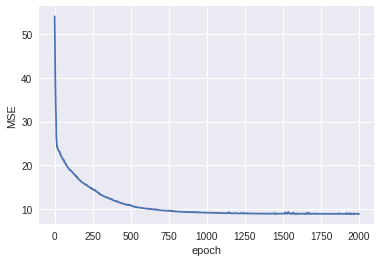

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

In [0]:
weights = layer.get_weights()

w = weights[0]
b = weights[1]

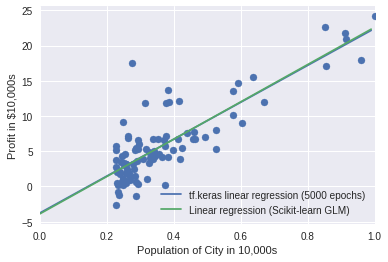

In [10]:
xx = np.arange(0, 1, 0.01)
yy = w * xx + b

plt.scatter(X, Y)
plt.plot(xx, yy.T, label='tf.keras linear regression (5000 epochs)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X, Y)
plt.plot(xx, (regr.intercept_+regr.coef_*xx).T, label='Linear regression (Scikit-learn GLM)')

plt.xlim(0,1)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

Interestingly, it takes thounds of epochs for tf.keras (with default parameters) to fit the linear model. SGD is performed weight better than adam for this one-D data.

In [11]:
path = 'ex1data2.txt'
data = pd.read_csv(path, header=None).values
X = data[:, 0:-1]
Y = data[:, [-1]]
X = (X - np.mean(X)) / np.std(X)

print(X.shape)
print(Y.shape)

(47, 2)
(47, 1)


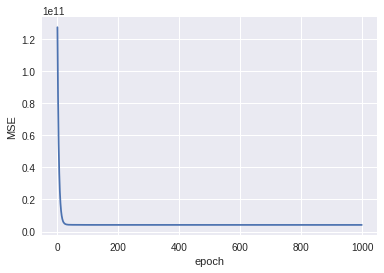

In [12]:
model = tf.keras.Sequential()
layer = tf.keras.layers.Dense(1, input_dim = 2)
model.add(layer)



model.compile(optimizer = 'SGD',
              loss = 'MSE',
              metrics=['MSE'])

history = model.fit(X, Y, epochs = 1000, verbose = 0)

# summarize history for loss
plt.plot(history.history['loss'])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

In [0]:
weights = layer.get_weights()
w = weights[0]
b = weights[1]

In [14]:
regr = LinearRegression()
regr.fit(X, Y)
print("my weights = " + str(w))
print("sklearn weights = " + str(regr.coef_))

my weights = [[ 154238.44]
 [-102193.79]]
sklearn weights = [[  159125.15353818 -9988017.38933274]]
